In [419]:
!pip install thinkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1

## Reading .wav of the original name "JAY"

In [420]:
# to read sound
from thinkdsp import read_wave
wave = read_wave('/content/jay.wav')
wave.make_audio()

### Wave Plot



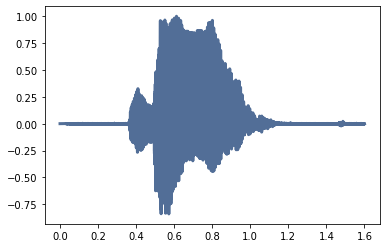

In [421]:
wave.plot()

### spectrum plot

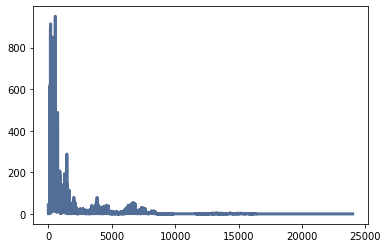

In [422]:
spectrum = wave.make_spectrum()
wave = spectrum.make_wave()
spectrum.plot()

## Cutting out the word "J" from my name "JAY"

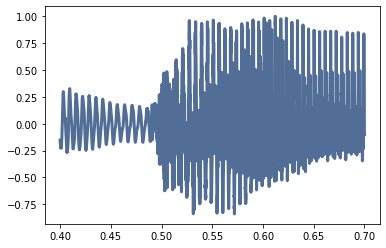

In [423]:
start = 0.4
duration = 0.3
j = wave.segment(start, duration)
j.plot()

### Original audio of the alphabet "J"

In [424]:
j.make_audio()

In [425]:
j.ys.shape

(14400,)

### Spectrum of J

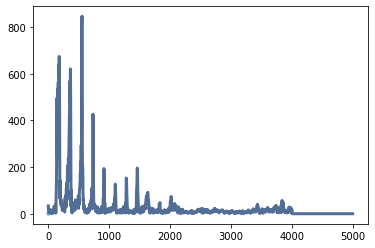

In [426]:
spectrum = j.make_spectrum()

# low pass
spectrum.low_pass(4000)
spectrum.plot(high=5000)
wave_sp = spectrum.make_wave()

# plotting
wave_sp.plot()

### Peaks of J

7201


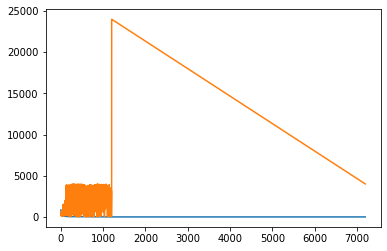

In [427]:
import matplotlib.pyplot as plt
peaks = spectrum.peaks()
print(len(peaks))
plt.plot(peaks)

### Synthesising J

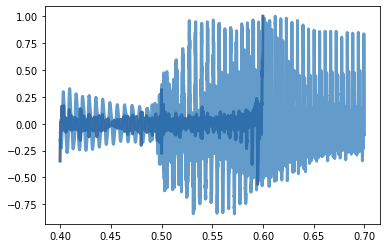

In [428]:
import thinkdsp
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import CosSignal, SinSignal, SawtoothSignal, SquareSignal

# A baseline sqaure signal
mix_j = SquareSignal(freq=5000, amp=0, offset=0) 

# Sum Sqaure signals for peaks
for peak in peaks[:5000]:
    mix_j += SquareSignal(freq=peak[1], amp=peak[0], offset=0) 

# Synthesised word J
mix_wave_j = mix_j.make_wave(duration=0.2, start=start)

# Normalized J
mix_wave_j.normalize()

# Plots
mix_wave_j.plot()
j.plot()

### Synthesised audio of J

In [429]:
mix_wave_j.make_audio()

In [430]:
# wrtie wave as file
mix_wave_j.write('J_synthesised.wav')

Writing J_synthesised.wav


### Cutting out the word "A" from my name "JAY"

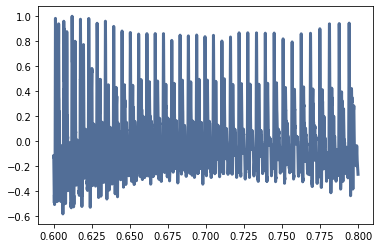

In [431]:
start = 0.6
duration = 0.2
a = wave.segment(start, duration)
a.plot()

### Orignial audio of A

In [432]:
a.make_audio()

### Spectrum of A

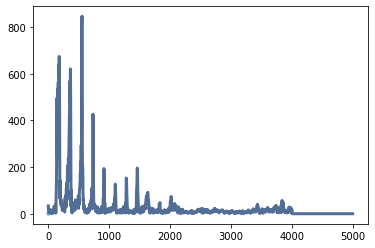

In [433]:
# Spectrum
spectrum = j.make_spectrum()

# low pass
spectrum.low_pass(4000)
spectrum.plot(high=5000)
wave = spectrum.make_wave()

# Plot
wave.plot()

### Getting the peaks from the spectrum

7201


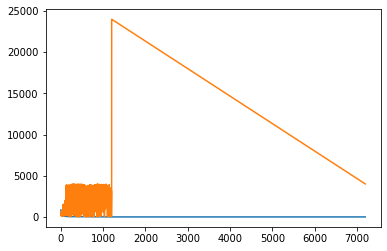

In [434]:
import matplotlib.pyplot as plt
peaks = spectrum.peaks()
print(len(peaks))
plt.plot(peaks)

### Sythesising A

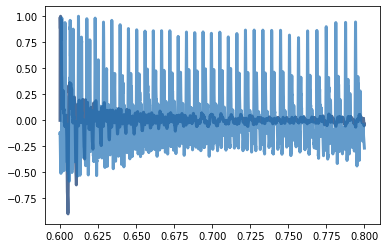

In [435]:
import thinkdsp
import numpy as np
from thinkdsp import CosSignal, SinSignal, SawtoothSignal, SquareSignal

# Baseline sawtooth signal
mix_a = SawtoothSignal(freq=880, amp=0, offset=0) 

# For each peak summing sin waves
for peak in peaks[:5000]:
    mix_a += SinSignal(freq=peak[1], amp=peak[0], offset=0)

# Synthesised word
mix_wave_a = mix_a.make_wave(duration=0.2, start=start)

# Normalization
mix_wave_a.normalize()

# Plots
mix_wave_a.plot()
a.plot()

### Synthesised A

In [436]:
mix_wave_a.make_audio()

In [437]:
# wrtie wave as file
mix_wave_a.write('A_synthesised.wav')

Writing A_synthesised.wav


### Cutting out the alphabet Y from "JAY"

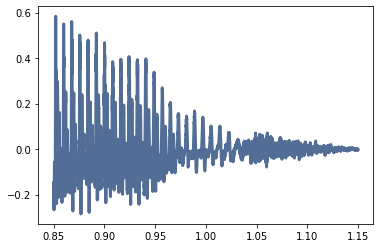

In [438]:
wave = read_wave('/content/jay.wav')
start = 0.85
duration = 0.3
y = wave.segment(start, duration)
y.plot()

### Original audio of the piece

In [439]:
y.make_audio()

### Spectrum of Y

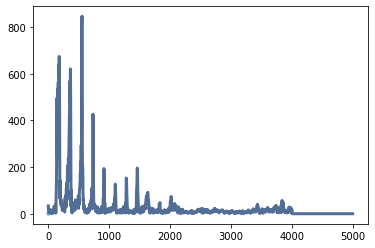

In [440]:
# Spectrum
spectrum = j.make_spectrum()

# low pass
spectrum.low_pass(4000)
spectrum.plot(high=5000)
wave = spectrum.make_wave()

# Plot
wave.plot()

### Getting the peaks of the spectrum

7201


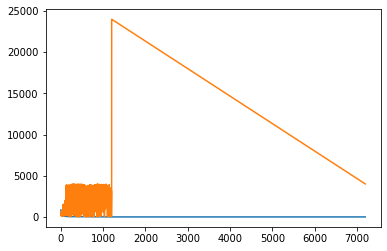

In [441]:
import matplotlib.pyplot as plt
peaks = spectrum.peaks()
print(len(peaks))
plt.plot(peaks)

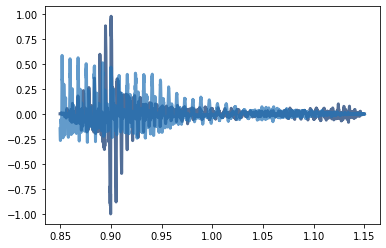

In [442]:
import thinkdsp
import numpy as np
from thinkdsp import CosSignal, SinSignal, SawtoothSignal, SquareSignal

# Baseline Sawtooth signal
mix_y = SawtoothSignal(freq=880, amp=0, offset=0) 

# For each peak summing sin signals
for peak in peaks[:5000]:
    mix_y += SinSignal(freq=peak[1], amp=peak[0], offset=0)

# Synthesised word
mix_wave_y = mix_y.make_wave(duration=0.3, start=start)

# Normalization
mix_wave_y.normalize()

# Apodizing
mix_wave_y.apodize()

# Plots
mix_wave_y.plot()
y.plot()

### Sythnesised Y

In [443]:
mix_wave_y.make_audio()

In [444]:
# wrtie wave as file
mix_wave_y.write('Y_synthesised.wav')

Writing Y_synthesised.wav


## Part 2: Synthesising the entire word "JAY"

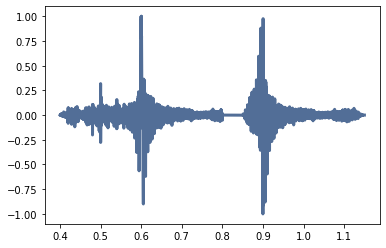

In [445]:
synthesised_name = mix_wave_j + mix_wave_a + mix_wave_y
synthesised_name.normalize()
synthesised_name.apodize()
synthesised_name.plot()

In [446]:
synthesised_name.make_audio()

In [447]:
# wrtie wave as file
synthesised_name.write('JAY_synthesised.wav')

Writing JAY_synthesised.wav
